# Data Science Coursera Capstone

#### The Aim of this notebook is to complete the IBM Data Science Coursera Capstone project.

### Introduction

In an effort to reduce the frequency of car collisions in a community, an algorithim must be developed to predict the severity of an accident given the current weather, road and visibility conditions. When conditions are bad, this model will alert drivers to remind them to be more careful.

In [18]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [19]:
df = pd.read_csv('Data-Collisions.csv',low_memory=False)

In [20]:
df.head(3)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N


In [21]:
df.shape

(194673, 38)

In [26]:
df[['COLLISIONTYPE']].value_counts()

COLLISIONTYPE
Parked Car       47987
Angles           34674
Rear Ended       34090
Other            23703
Sideswipe        18609
Left Turn        13703
Pedestrian        6608
Cycles            5415
Right Turn        2956
Head On           2024
dtype: int64

In [22]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

## Identify and remove columns having more than 30% missing values

In [6]:
missing_values = df.isnull().mean() * 100
missing_values = missing_values[missing_values>30].sort_values()
cols_to_remove=missing_values.index.to_list()
df = df.drop(cols_to_remove,axis = 1)
missing_values

SDOTCOLNUM        40.959455
EXCEPTRSNCODE     56.434123
INTKEY            66.574718
INATTENTIONIND    84.689710
SPEEDING          95.205807
EXCEPTRSNDESC     97.103861
PEDROWNOTGRNT     97.602646
dtype: float64

## Add some new columns for analysis

In [7]:
df['dt'] = pd.to_datetime(df['INCDATE'],format="%Y/%m/%d")
df['MONTH'] = df['dt'].apply(lambda time: time.month)
df['DAY_OF_WEEK'] = df['dt'].apply(lambda time: time.dayofweek)

## Remove ids, duplicate and imbalanced and irrelevant data columns

In [8]:
cols_to_remove = ['X', 'Y', 'OBJECTID','INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS','SEVERITYDESC','SEVERITYCODE.1','SEGLANEKEY', 'CROSSWALKKEY','LOCATION','INCDTTM','SDOT_COLCODE','SDOT_COLDESC','HITPARKEDCAR','ST_COLDESC','PEDCOUNT', 'PEDCYLCOUNT','INCDATE','dt','ST_COLCODE']
df = df.drop(cols_to_remove,axis = 1)

In [9]:
df.shape


(194673, 12)

In [10]:
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,MONTH,DAY_OF_WEEK
0,2,Intersection,Angles,2,2,At Intersection (intersection related),N,Overcast,Wet,Daylight,3,2
1,1,Block,Sideswipe,2,2,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,12,2
2,1,Block,Parked Car,4,3,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,11,3
3,1,Block,Other,3,3,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,3,4
4,2,Intersection,Angles,2,2,At Intersection (intersection related),0,Raining,Wet,Daylight,1,2


## Correct Data type

In [11]:
df[['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE','JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND','MONTH', 'DAY_OF_WEEK']] = df[['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE','JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND','MONTH', 'DAY_OF_WEEK']].astype('object')

In [12]:
df.columns

Index(['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT',
       'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'MONTH', 'DAY_OF_WEEK'],
      dtype='object')

## Fill/Drop missing values

#### Here it shows very small amount data are missing. So instead of filling it with any method, let's drop these rows.

In [13]:
df.isnull().mean() * 100

SEVERITYCODE     0.000000
ADDRTYPE         0.989351
COLLISIONTYPE    2.519096
PERSONCOUNT      0.000000
VEHCOUNT         0.000000
JUNCTIONTYPE     3.251093
UNDERINFL        2.508822
WEATHER          2.610018
ROADCOND         2.574574
LIGHTCOND        2.655736
MONTH            0.000000
DAY_OF_WEEK      0.000000
dtype: float64

In [14]:
df.dropna(axis=0,inplace=True)

### Check data distribution with respect to the target variable

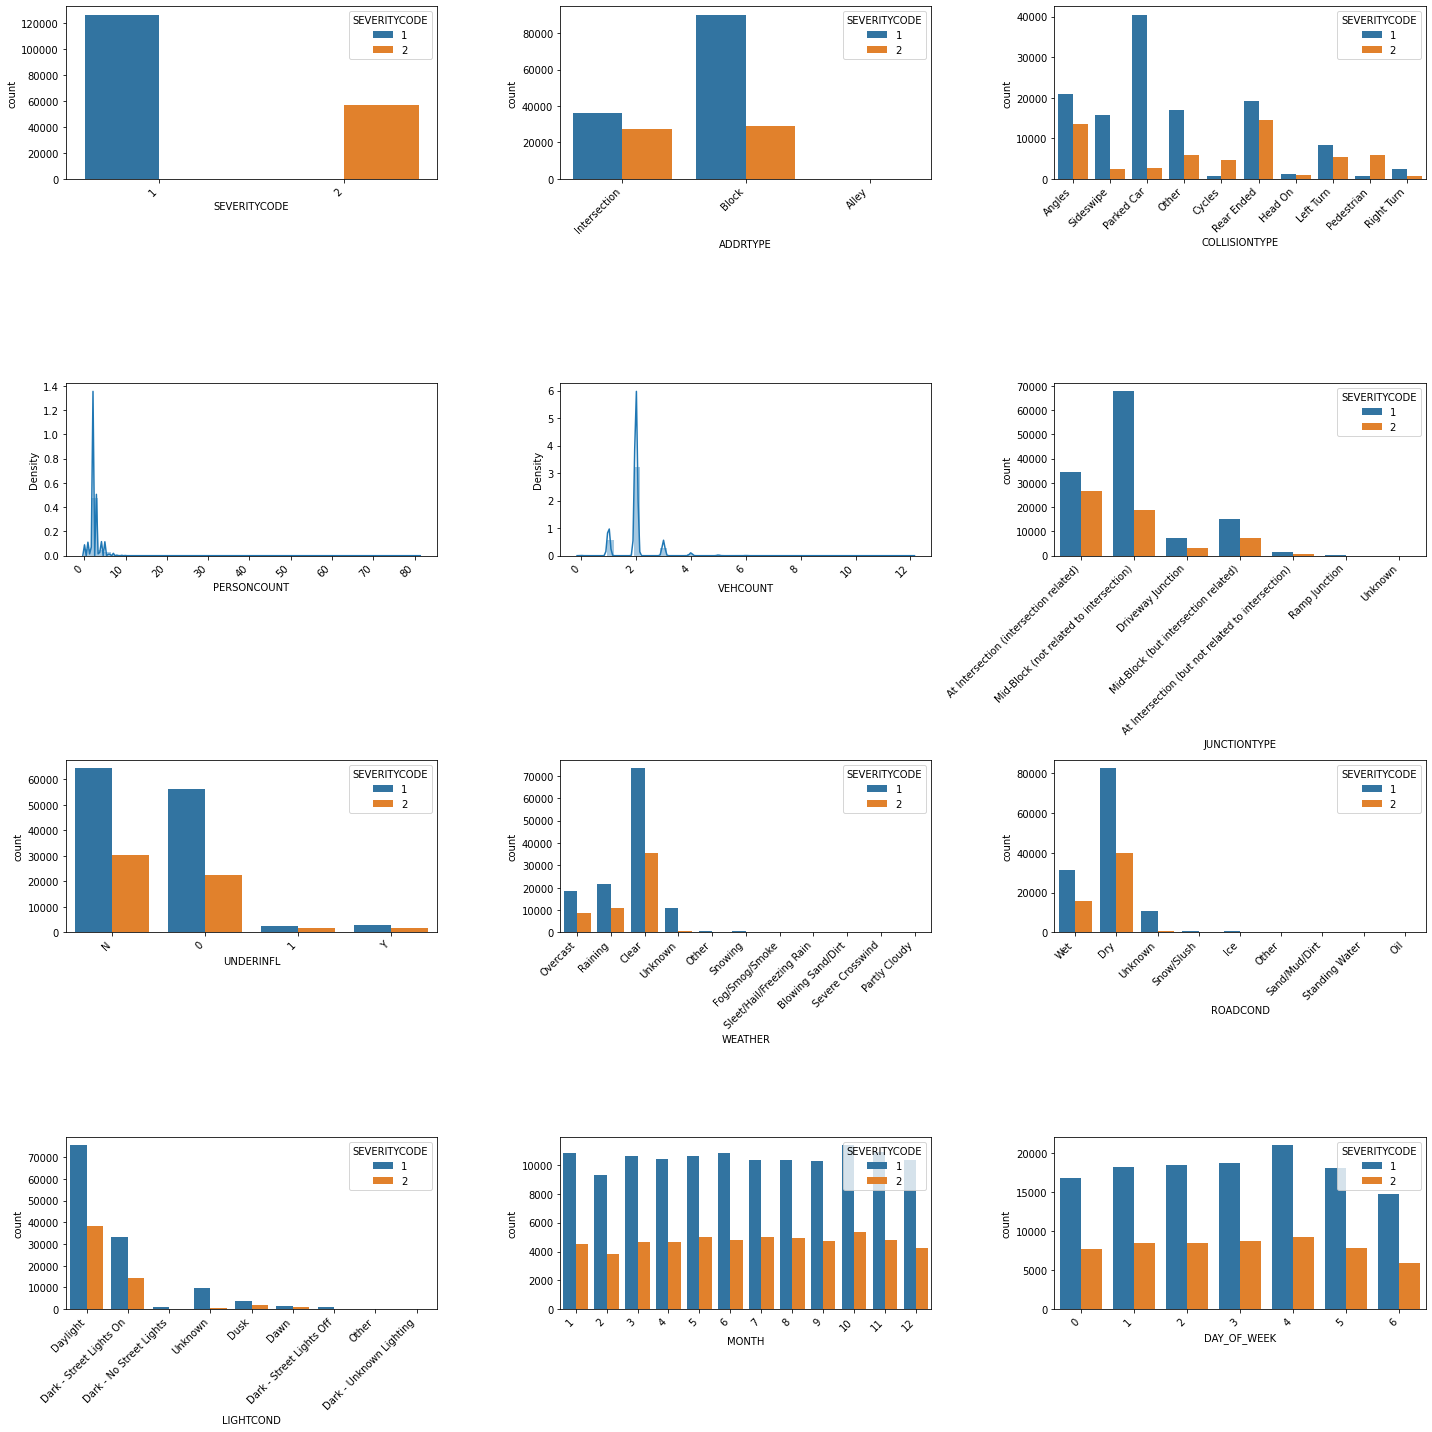

In [15]:
fig, axes =plt.subplots(4,3, figsize=(20,20))
axes = axes.flatten()
for ax, col in zip(axes, df.columns):
    ax.set_xlabel(col)
    if df[col].dtype=='O':
        sns.countplot(x=col, hue ='SEVERITYCODE', data=df, ax=ax)
    else:
        sns.distplot(df[col],ax=ax)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

fig.tight_layout()


In [16]:
df.columns


Index(['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT',
       'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'MONTH', 'DAY_OF_WEEK'],
      dtype='object')

In [17]:
df['SEVERITYCODE']

0         2
1         1
2         1
3         1
4         2
         ..
194668    2
194669    1
194670    2
194671    2
194672    1
Name: SEVERITYCODE, Length: 182895, dtype: object